In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)
    for i in range(cum_sum.shape[0]):
        if i == 0:
            continue
        cum_sum[i] = cum_sum[i] / (i + 1)
    return cum_sum



In [3]:
times_sa = {}
times_ts = {}
res_sa = {}
res_ts = {}
best = {}
for file in pathlib.Path("../results").glob("*sa.csv"):
	instance = file.name.split(".")[0][:-3]
	with open(f"../data/qaplib/{instance}.sln") as f:
		lines = f.readlines()
		best_score = float(lines[0].split()[1])
	problem = file.name.split(".")[0][:-3]
	print(problem)
	df = pd.read_csv(file)
	times_sa[problem] =  df.loc[:, 'time'].min()
	res_sa[problem] =  df.loc[:, 'score'].min()
	best[problem] = best_score
for file in pathlib.Path("../results").glob("*ts.csv"):
	instance = file.name.split(".")[0][:-3]
	problem = file.name.split(".")[0][:-3]
	print(problem)
	df = pd.read_csv(file)
	times_ts[problem] =  df.loc[:, 'time'].mean()
	res_ts[problem] =  df.loc[:, 'score'].mean()

tai256c
bur26a
lipa90a
wil100
chr15c
had20
els19
chr25a
els19
bur26a
tai256c
chr25a
lipa90a
had20
chr15c
wil100


In [4]:
times_ts = dict(sorted(times_ts.items()))
times_sa = dict(sorted(times_sa.items()))
res_ts = dict(sorted(res_ts.items()))
res_sa = dict(sorted(res_sa.items()))

best = dict(sorted(best.items()))


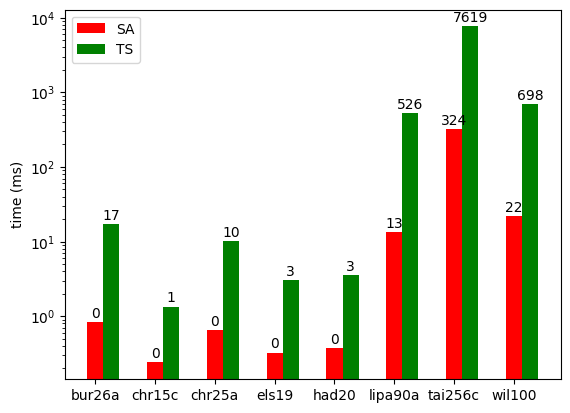

In [5]:
N = len(times_ts)
ind = np.arange(N)  # the x locations for the groups
width = 0.27  # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

sa = times_sa.values()
rects1 = ax.bar(ind, sa, width, color="r")
ts = times_ts.values()
rects2 = ax.bar(ind + width, ts, width, color="g")
ax.set_ylabel("time (ms)")
plt.xticks(range(len(times_sa)), sorted(list(times_sa.keys())))

ax.legend((rects1[0], rects2[0]), ("SA", "TS"))


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * h,
            "%d" % int(h),
            ha="center",
            va="bottom",
        )

ax.set_yscale('log')
autolabel(rects1)
autolabel(rects2)

plt.show()

In [6]:
times_ts = dict(sorted(times_ts.items()))
times_sa = dict(sorted(times_sa.items()))
res_ts = dict(sorted(res_ts.items()))
res_sa = dict(sorted(res_sa.items()))

best = dict(sorted(best.items()))



dict_values([5426670.0, 9504.0, 3796.0, 17212548.0, 6922.0, 360630.0, 44759294.0, 273038.0])
dict_values([np.int64(5426670), np.int64(9504), np.int64(3988), np.int64(17937024), np.int64(6922), np.int64(362563), np.int64(44899636), np.int64(273138)])
dict_values([np.float64(17.0358), np.float64(1.3437), np.float64(10.236900000000002), np.float64(3.0457), np.float64(3.5881999999999996), np.float64(526.2084000000001), np.float64(7619.051999999999), np.float64(698.2786)])
Rectangle(xy=(-0.135, 0), width=0.27, height=5.42667e+06, angle=0)


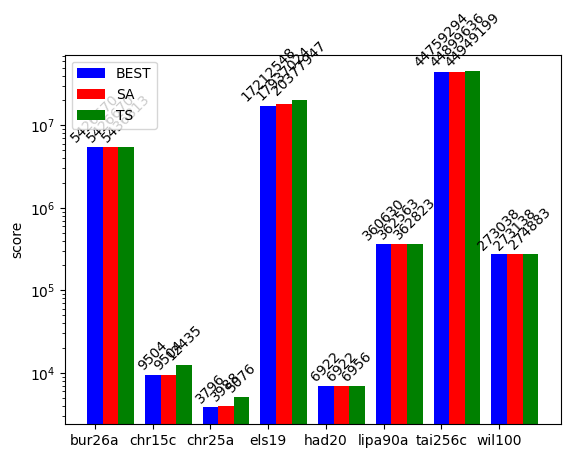

In [7]:
N = len(times_ts)
ind = np.arange(N)  # the x locations for the groups
width = 0.27  # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)


b = best.values()
print(b)
rects0 = ax.bar(ind, b, width, color="b")
sa = res_sa.values()
print(sa)
rects1 = ax.bar(ind + width, sa, width, color="r")
print(ts)
ts = res_ts.values()
rects2 = ax.bar(ind + 2 * width, ts, width, color="g")
ax.set_ylabel("score")
plt.xticks(range(len(res_ts)), sorted(list(res_ts.keys())))
print(rects0[0])
ax.legend((rects0[0], rects1[0], rects2[0]), ("BEST", "SA", "TS"))
ax.set_yscale("log")


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * h,
            "%d" % int(h),
            ha="center",
            va="bottom",
            rotation=45,
        )


autolabel(rects0)
autolabel(rects1)
autolabel(rects2)


plt.show()

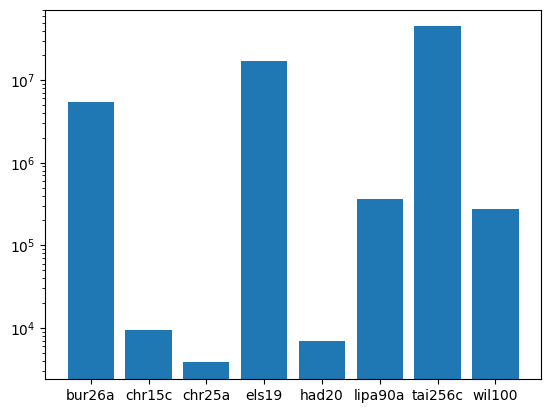

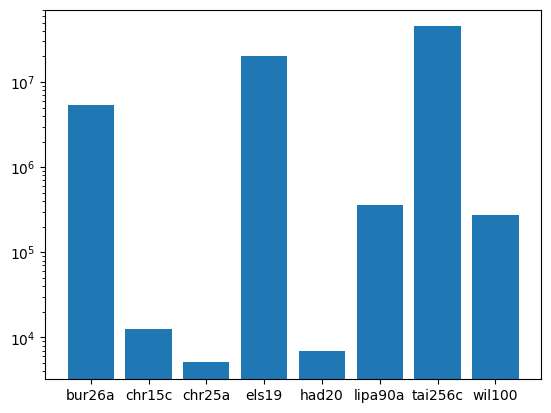

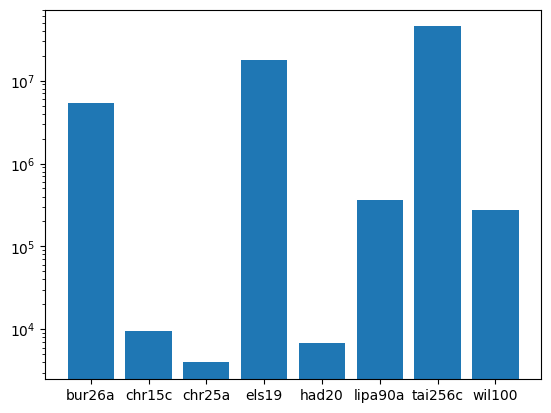

In [8]:


names, counts = zip(*best.items())
plt.bar(names, counts)
plt.yscale('log')

plt.show()

names, counts = zip(*res_ts.items())
plt.bar(names, counts)
plt.yscale('log')
plt.show()

names, counts = zip(*res_sa.items())
plt.bar(names, counts)
plt.yscale('log')
plt.show()